<a href="https://colab.research.google.com/github/RyanSebastian046/PortofolioDataAnalyst/blob/main/describtive_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [2]:
import pandas as pd
import numpy as np

#visualisasi
import matplotlib
import matplotlib.pyplot as plt  # membuat plot
import seaborn as sns # membuat grafik / statistik

%matplotlib inline

matplotlib.style.use('ggplot')

# import dataset

In [3]:
#load data csv
data = pd.read_csv ("HR_comma_sep.csv")

# Quick Look

In [4]:
#melihat data 5 baris teratas
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Deskriptif Statistik

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data ['satisfaction_level'].describe()

,satisfaction_level
count,14999.000000
mean,0.612834
std,0.248631
min,0.090000
25%,0.440000
50%,0.640000
75%,0.820000
max,1.000000


# histogram

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

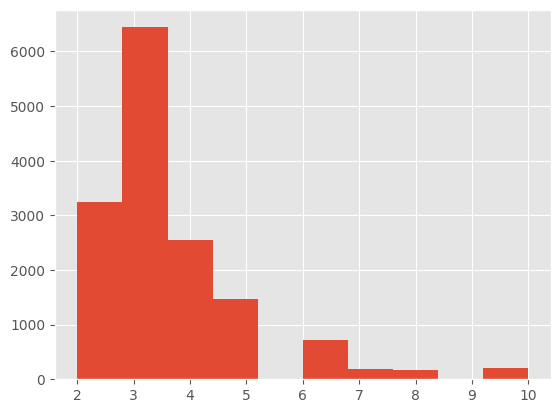

In [8]:
plt.hist(data['time_spend_company'])

In [9]:
x = data['time_spend_company']
x

,time_spend_company
0,3
1,6
2,4
3,5
4,3
...,...
14994,3
14995,3
14996,3
14997,4


# mean, median, modus

In [10]:
print('mean =', x.mean())
print('mwdian =', x.median())
print('modus =', x.mode())

mean = 3.498233215547703
mwdian = 3.0
modus = 0    3
Name: time_spend_company, dtype: int64


# Vertical dan horizontal Boxplot

<Axes: ylabel='time_spend_company'>

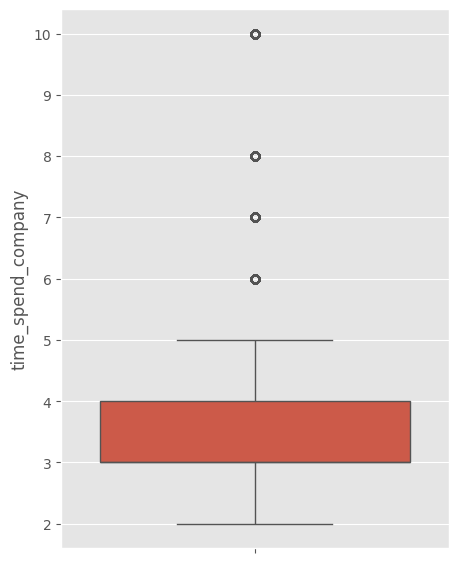

In [11]:
# vertikal boxplot
plt.figure(figsize=(5,7))
sns.boxplot(y='time_spend_company', data=data)

<Axes: xlabel='time_spend_company'>

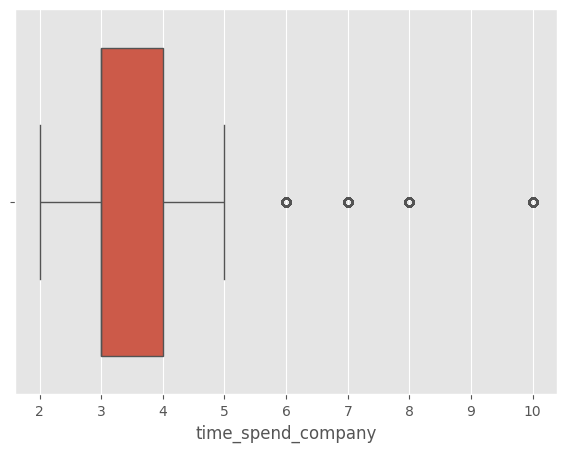

In [12]:
# horizontal boxplot
plt.figure(figsize=(7,5))
sns.boxplot(x ='time_spend_company', data=data)

In [13]:
# pivot tabel
data.groupby(['left'])['time_spend_company'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


# Analisis Korelasi

<Axes: >

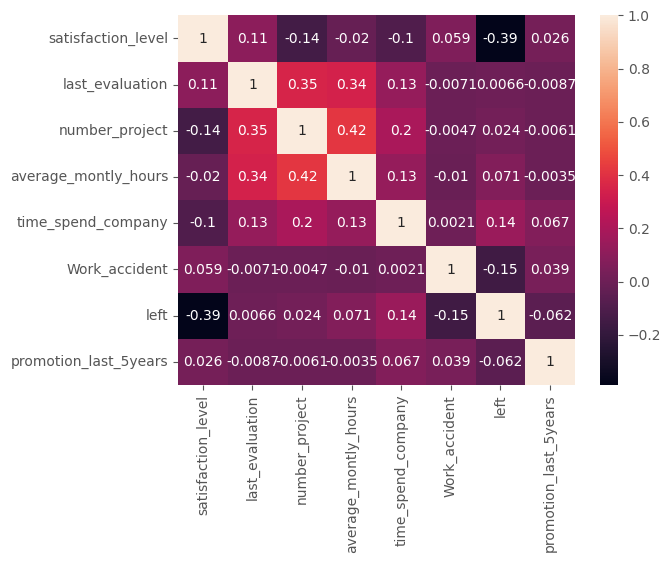

In [14]:
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap using the correlation matrix of numeric data
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='left', ylabel='satisfaction_level'>

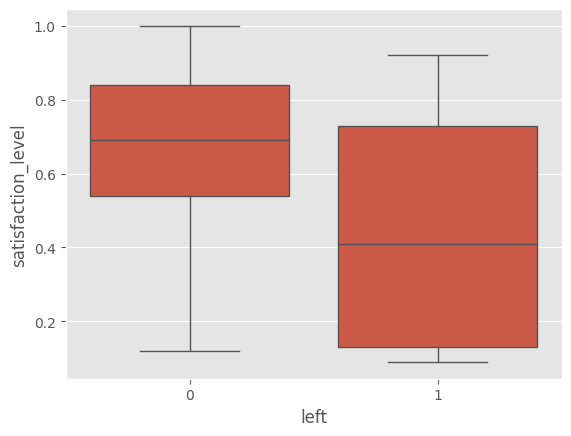

In [15]:
data['left'].value_counts(normalize=True)
sns.boxplot(x='left', y='satisfaction_level', data=data)


In [16]:
data.groupby('sales')['satisfaction_level'].mean().sort_values()


,satisfaction_level
sales,
accounting,0.582151
hr,0.598809
technical,0.607897
sales,0.614447
IT,0.618142
support,0.618300
marketing,0.618601
product_mng,0.619634
RandD,0.619822


<Axes: xlabel='average_montly_hours', ylabel='last_evaluation'>

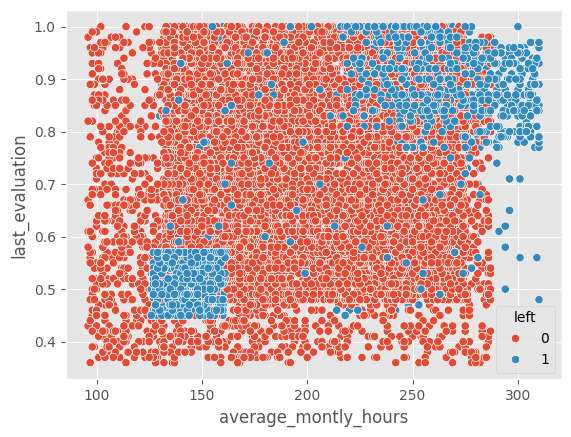

In [17]:
sns.scatterplot(x='average_montly_hours', y='last_evaluation', hue='left', data=data)


<Axes: xlabel='salary', ylabel='satisfaction_level'>

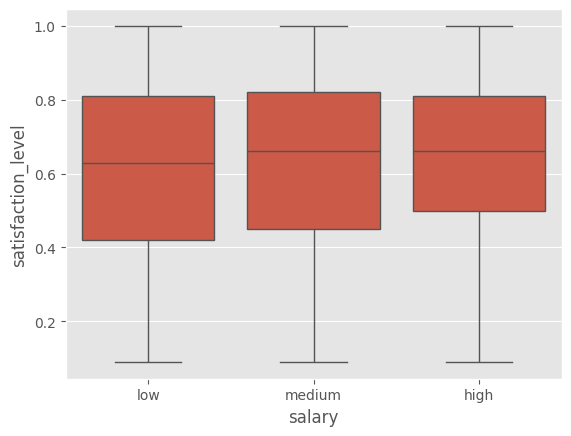

In [18]:
sns.boxplot(x='salary', y='satisfaction_level', data=data)

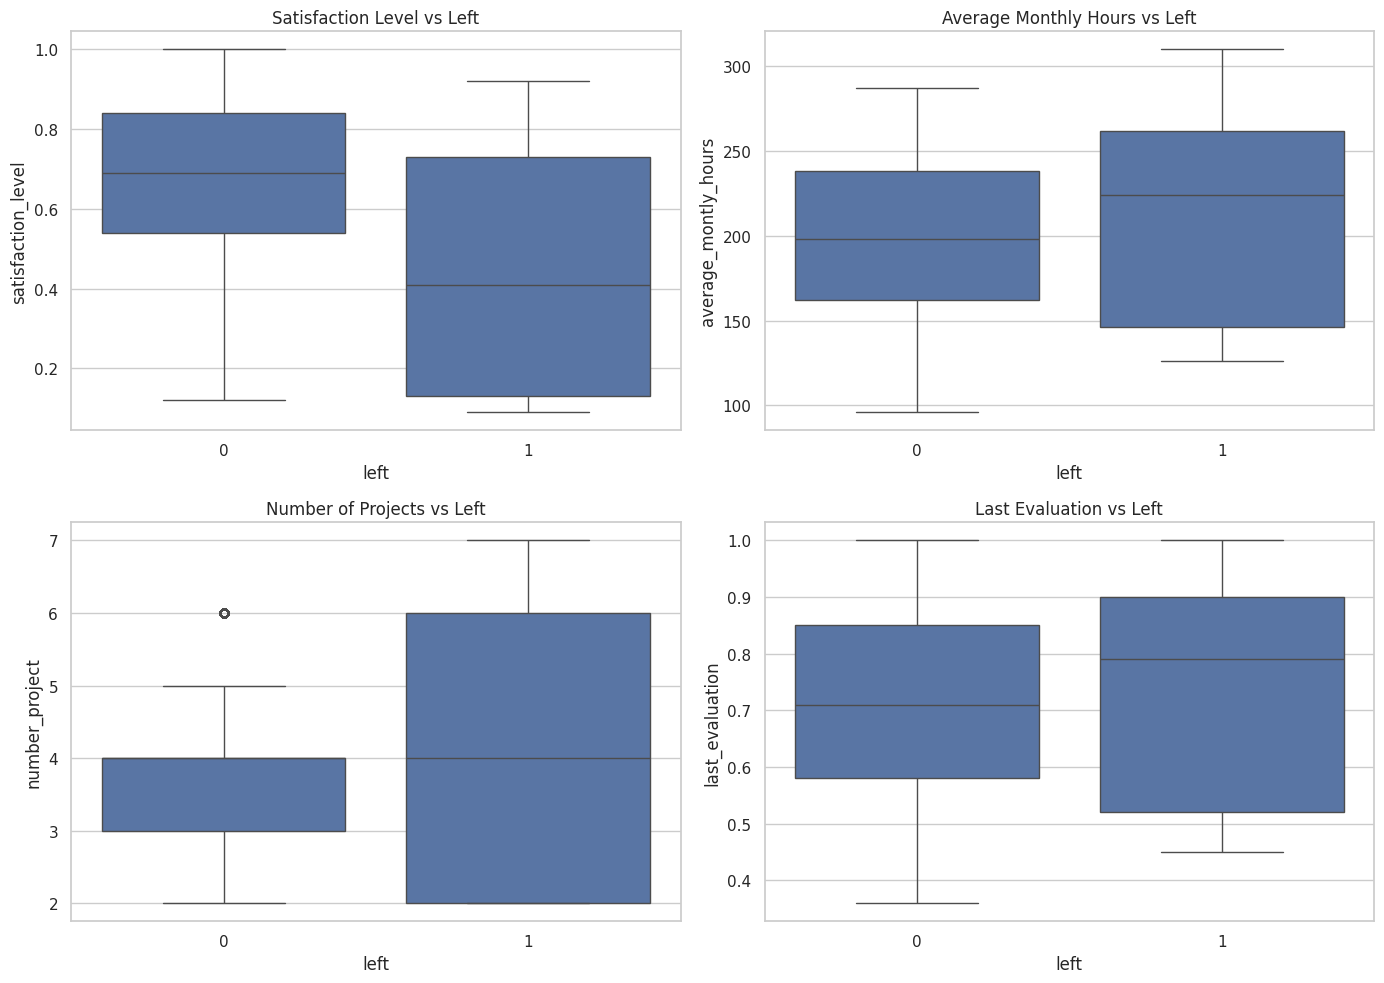

In [19]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# 1. Faktor Penyebab Karyawan Keluar
fig1, axes = plt.subplots(2, 2, figsize=(14, 10))

# Changed df to data and Satisfaction_level to satisfaction_level
sns.boxplot(x='left', y='satisfaction_level', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction Level vs Left')

# Changed df to data
sns.boxplot(x='left', y='average_montly_hours', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Average Monthly Hours vs Left')

# Changed df to data
sns.boxplot(x='left', y='number_project', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Number of Projects vs Left')

# Changed df to data
sns.boxplot(x='left', y='last_evaluation', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Last Evaluation vs Left')

plt.tight_layout()

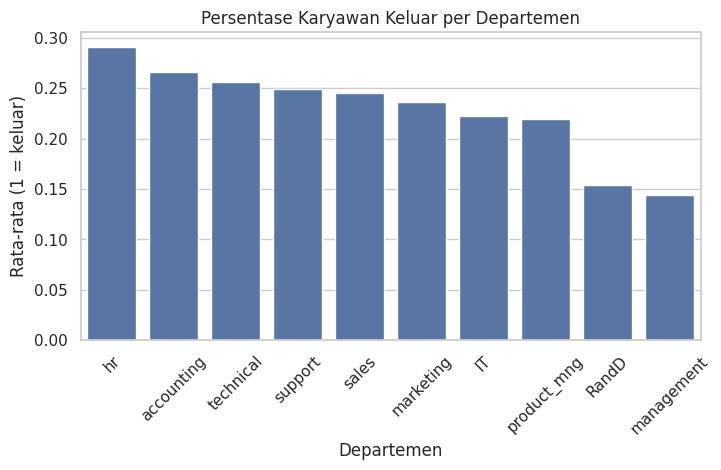

In [20]:
# 2. Departemen dengan Turnover Tinggi

# Hitung persentase karyawan keluar per departemen
turnover_by_dept = data.groupby('sales')['left'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=turnover_by_dept.index, y=turnover_by_dept.values)
plt.xticks(rotation=45)
plt.title('Persentase Karyawan Keluar per Departemen')
plt.ylabel('Rata-rata (1 = keluar)')
plt.xlabel('Departemen')
plt.show()


<ipython-input-21-449b68d24079>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary', y='left', data=data, estimator=lambda x: sum(x)/len(x), ci=None)


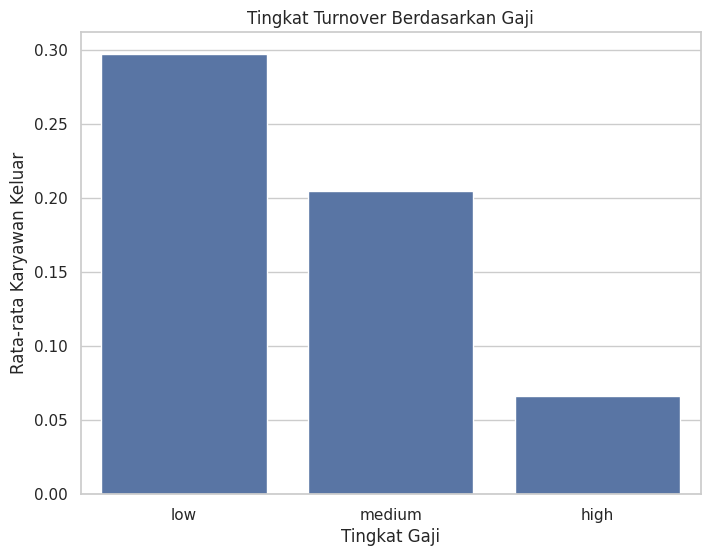

In [21]:
# 3. Pengaruh Gaji terhadap Turnover

plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='left', data=data, estimator=lambda x: sum(x)/len(x), ci=None)
plt.title('Tingkat Turnover Berdasarkan Gaji')
plt.ylabel('Rata-rata Karyawan Keluar')
plt.xlabel('Tingkat Gaji')
plt.show()


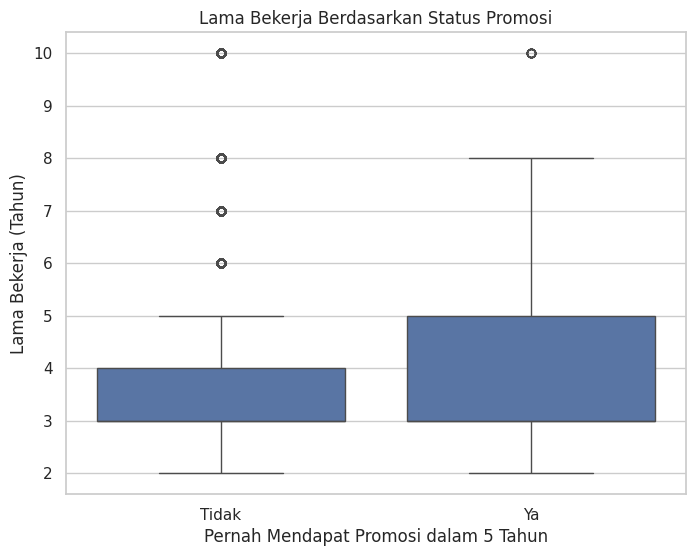

In [22]:
# 4. Promosi dan Loyalitas (lama bekerja)

plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion_last_5years', y='time_spend_company', data=data)
plt.title('Lama Bekerja Berdasarkan Status Promosi')
plt.xlabel('Pernah Mendapat Promosi dalam 5 Tahun')
plt.ylabel('Lama Bekerja (Tahun)')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()
